# Alzheimer's MRI Scan Classification Project

## Introduction

The project focuses on classifying MRI scans into stages of Alzheimer's disease, utilizing neural networks to improve diagnostic accuracy and support early detection.

## Import Liabraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm

import matplotlib.pyplot as plt

# Metrics:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Simple Neural Network

## Data Preprocessing


The MRI scan images and corresponding labels were successfully loaded from the dataset, which includes a variety of images across four classes representing different stages of Alzheimer's disease. Initial data visualization confirmed the diversity in the dataset and the complexity of the classification task.

## Load Datasets

Training and testing datasets were loaded as tensors using PyTorch, with training consisting of 5121 images and testing of 1279 images. The images were loaded in their original dimensions (3 channels, 208x176 pixels) along with their labels.

In [2]:
# Root File Location of the Data:
file_loc = "C:\\Users\\maure\\Deep learning"


# Training Data Location:
load_train = f'{file_loc}\\train_data.pt'
load_train_labels = f'{file_loc}\\train_labels.pt'

# Testing Data Location:
load_test = f'{file_loc}\\test_data.pt'
load_test_labels = f'{file_loc}\\test_labels.pt'



# Load Training and Testing Data:
# Note: The "to" function, can also be used to change to float.

train_images = torch.load(load_train)
test_images = torch.load(load_test)
train_labels = torch.load(load_train_labels)
test_labels = torch.load(load_test_labels)

## View Datasets


Sample images were displayed to verify the data loading process and to provide a visual understanding of the MRI scans. The displayed images highlighted the differences between the stages of Alzheimer's disease, underscoring the challenge of the classification task.



In [3]:
train_images.shape, test_images.shape

(torch.Size([5121, 3, 208, 176]), torch.Size([1279, 3, 208, 176]))

The Corrosponding Label is: 3


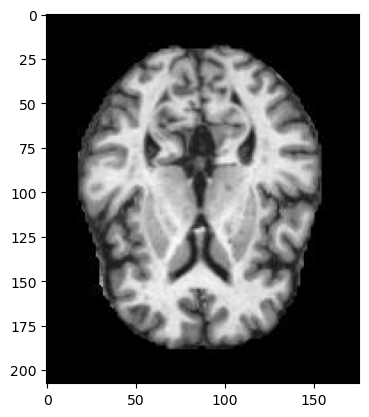

In [4]:
sample_num = 500
print(f'The Corrosponding Label is: {train_labels[sample_num]}')
plt.imshow(train_images[sample_num][0], cmap='gray')
plt.show()

## Flatten Data for Simple Neural Network

The images were successfully flattened for compatibility with the Simple Neural Network (SNN) model. This process involved reshaping the images from a 3D tensor (3x208x176) to a 1D tensor (109824 elements), preparing them for input into the SNN.

In [5]:
train_images.shape[3]

176

In [6]:
train_images = train_images.view(train_images.shape[0], -1)
test_images = test_images.view(test_images.shape[0], -1)


In [7]:
print(train_images.shape, test_images.shape)
print(train_images.type(), test_images.type())
print(train_labels.type(), test_labels.type())

torch.Size([5121, 109824]) torch.Size([1279, 109824])
torch.FloatTensor torch.FloatTensor
torch.LongTensor torch.LongTensor


## Model Development


Model Definition
The basic SNN model comprised three linear layers with ReLU activations and a final log softmax layer for classification

In [8]:
# Create a different style network. 
class Simple_NN1(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 4)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),  dim = 1)

        return x

In [9]:
net = Simple_NN1(n_features=109824)
print(net)

Simple_NN1(
  (fc1): Linear(in_features=109824, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)


## Training Loop

Simple Neural Network models were trained over 10 epochs using the SGD optimizer. A learning rate of 0.01 and batch size of 100

In [10]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")


In [11]:
train(net, train_images, train_labels, epochs=10, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:27<00:00,  1.92it/s]


Iteration 0 | Loss: 0.9053816199302673


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:28<00:00,  1.83it/s]


Iteration 1 | Loss: 0.8581114411354065


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.96it/s]


Iteration 2 | Loss: 0.853461503982544


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:25<00:00,  2.03it/s]


Iteration 3 | Loss: 0.8390425443649292


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:27<00:00,  1.87it/s]


Iteration 4 | Loss: 0.8105616569519043


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:29<00:00,  1.79it/s]


Iteration 5 | Loss: 0.8179029822349548


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:28<00:00,  1.85it/s]


Iteration 6 | Loss: 0.7989626526832581


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:31<00:00,  1.64it/s]


Iteration 7 | Loss: 0.7825060486793518


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.99it/s]


Iteration 8 | Loss: 0.7686967253684998


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.97it/s]

Iteration 9 | Loss: 0.7494081854820251


## Testing Loop

In [12]:
def test(model, images, labels):

    with torch.no_grad():
        y_predicted = model.forward(images)

    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    predicted_classes = torch.argmax(y_predicted, dim = 1)
    print(predicted_classes[0:5])
    print(labels[0:5])


    # Accuracy:
    correct = 0
    total = 0

    for i in range(len(predicted_classes)):
        if predicted_classes[i] == labels[i]:
            correct += 1
        total += 1

    print(f"Accuracy: {round(correct/total, 3)}")

    # Confusion Matrix:


    conf_matrix = confusion_matrix(labels, predicted_classes)
    print(conf_matrix)
    


   # Visualization inside the test function
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Data Examples: tensor([-4.8903, -5.6476, -0.2398, -1.5985]) 

3
tensor([2, 2, 2, 2, 2])
tensor([3, 2, 2, 0, 0])
Accuracy: 0.529
[[  0   0 143  36]
 [  0   0  10   2]
 [  0   0 629  11]
 [  0   0 401  47]]


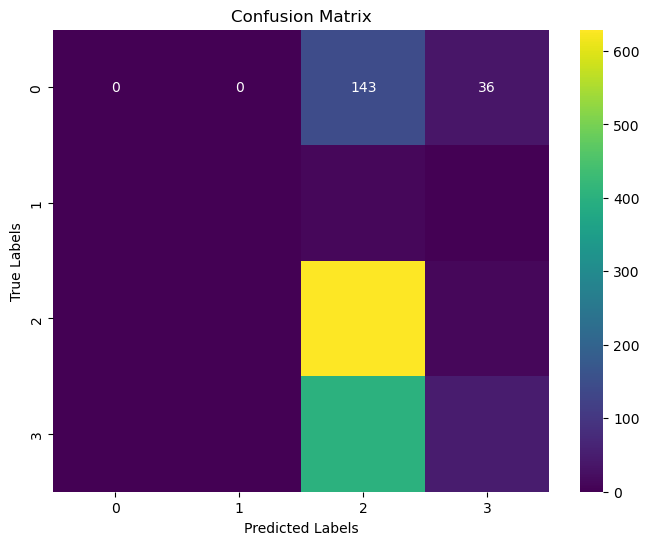

In [13]:
test(net, test_images, test_labels)

## Model Evaluation


Model Training: SNN models were trained over 10 epochs using the SGD optimizer. The training process demonstrated decreasing loss over time, indicating learning.
Loss Function: The training process showed a gradual decrease in Cross-Entropy Loss over 10 epochs, indicating that the model was learning from the training data. The final reported loss was approximately 0.749, suggesting that the model's predictions were getting closer to the actual labels over time.
Confusion Matrix: The confusion matrix for the basic SNN model highlighted challenges in accurately classifying the stages of Alzheimer's. Specifically, there were significant misclassifications between Mild Demented (class 0) and Very Mild Demented (class 3), as well as between NonDemented (class 2) and the other stages. 
The accuracy was around 52.9%, showing room for improvement, especially in distinguishing between closely related stages of the disease.


## Convolutional Neural Network (CNN)

Following the SNN's structure, the CNN models are developed with a focus on leveraging spatial information within MRI scans for improved classification accuracy. Our data was reloaded and viewed and flattened utilizing initial preprocessing as with Simple Neural Network 

## Load Dataset

In [14]:
# Root File Location of the Data:
file_loc = "C:\\Users\\maure\\OneDrive - University of South Wales\\Deep learning coursework"


# Training Data Location:
load_train = f'{file_loc}\\train_data.pt'
load_train_labels = f'{file_loc}\\train_labels.pt'

# Testing Data Location:
load_test = f'{file_loc}\\test_data.pt'
load_test_labels = f'{file_loc}\\test_labels.pt'

In [15]:
# Load Training and Testing Data:
# Note: The "to" function, can also be used to change to float.
conv_train_images = torch.load(load_train)
conv_test_images = torch.load(load_test)
conv_train_labels = torch.load(load_train_labels).to(torch.long)
conv_test_labels = torch.load(load_test_labels).to(torch.long)

## View Dataset

In [16]:
print(conv_train_images.shape)

torch.Size([5121, 3, 208, 176])


The Corrosponding Label is: 3


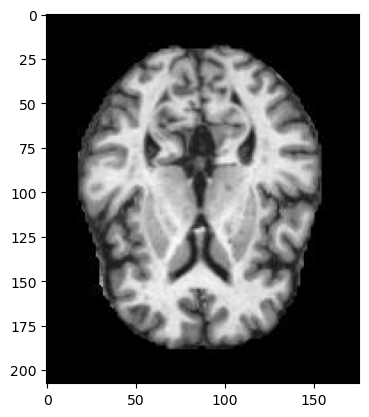

In [17]:
sample_num = 500
print(f'The Corrosponding Label is: {conv_train_labels[sample_num]}')
plt.imshow(conv_train_images[sample_num][0], cmap='gray')
plt.show()

## Convolutional Neural Network - Step 1


Model Definition
The basic CNN features convolutional layers followed by max pooling, leading to linear layers for classification.
The CNN models utilize the same SGD optimizer and Cross-Entropy Loss function as the SNN models

In [18]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data: Cannot yet be defined
        
        
        # Linear Layers: Cannot yet be defined
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")


        




        return x


        

In [19]:
net1  = Conv_NN(n_channels = 3)

In [20]:
n_samples = 10
test_output = net1.forward(conv_train_images[0:n_samples])

Step 1: Shape of Data before Flattening: torch.Size([10, 16, 49, 41])


In [21]:
# OPTION 1: View Function:
test_output1 = test_output.view(-1, 16*49*41)
print(f"The Shape after using the View Function is: {test_output1.shape}")

# OPTION 2: Flatten Function:

n_dimensions = 1 # What Happens when I change this number?
myfunc = nn.Flatten(n_dimensions)

test_output2 = myfunc(test_output)
print(f"The Shape after using the Flatten Function is: {test_output2.shape}")

The Shape after using the View Function is: torch.Size([10, 32144])
The Shape after using the Flatten Function is: torch.Size([10, 32144])


## Convolutional Neural Network - Step 2


In [22]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(16*49*41, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x):
        # Step 1: Convolutional Layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # print(f"Step 1: Shape of Data before Flattening: {x.shape}")


        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

## Loss and Optimizer

In [23]:
net  = Conv_NN(n_channels = 3)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

## Training Loop (CPU)

In [24]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(conv_train_images), BATCH_SIZE)):
        # Batch Our Data:
        batch_data = conv_train_images[i:i+BATCH_SIZE]
        batch_labels = conv_train_labels[i:i+BATCH_SIZE]
        # Calculate Output:
        net.zero_grad()  
        output = net(batch_data)  
        # CAlculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:29<00:00,  1.72s/it]


tensor(0.9400, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:35<00:00,  1.84s/it]


tensor(0.9337, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:45<00:00,  2.03s/it]


tensor(0.9037, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:28<00:00,  1.71s/it]


tensor(0.8652, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:29<00:00,  1.73s/it]


tensor(0.8559, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:33<00:00,  1.80s/it]


tensor(0.8308, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:30<00:00,  1.73s/it]


tensor(0.8430, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:29<00:00,  1.72s/it]


tensor(0.8184, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:30<00:00,  1.74s/it]


tensor(0.8256, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [01:29<00:00,  1.73s/it]

tensor(0.8189, grad_fn=<NllLossBackward0>)


## Testing Loop

In [25]:
with torch.no_grad():
    predicted = net.forward(conv_test_images)
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(conv_test_labels[0:5])
    
    


tensor([[-4.5316, -4.9239, -0.2665, -1.5328],
        [-4.5707, -4.9555, -0.2667, -1.5291]]) torch.Size([2, 4])
tensor([2, 2, 2, 2, 2])
tensor([3, 2, 2, 0, 0])


In [26]:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == conv_test_labels[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.511


In [27]:
cf_mat = confusion_matrix(conv_test_labels, predicted_classes)
cf_mat

array([[  0,   0, 167,  12],
       [  0,   0,  12,   0],
       [  0,   0, 638,   2],
       [  0,   0, 432,  16]], dtype=int64)

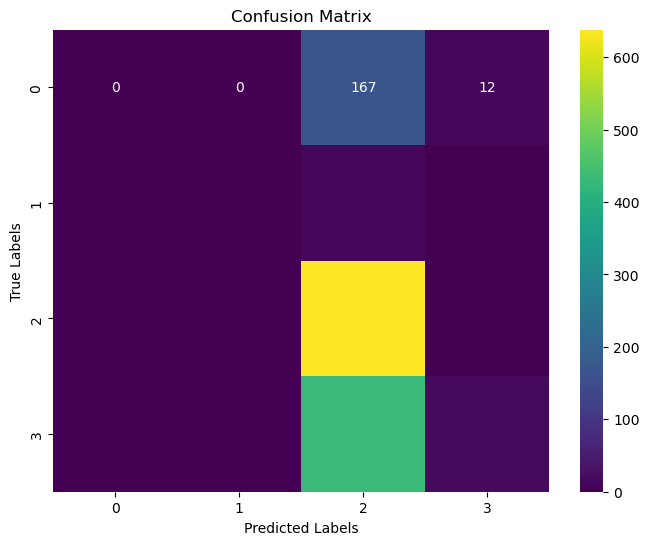

In [28]:
# Visualization 
plt.figure(figsize=(8, 6))
sns.heatmap(cf_mat, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
    

## Model Evaluation

Loss Function: Similar to the basic SNN model, the basic CNN model's Cross-Entropy Loss decreased over epochs, but the decrease was more pronounced, indicating that the CNN was better at extracting relevant features from the MRI scans. The final loss was 0.8189.
Confusion Matrix: The basic CNN model's confusion matrix showed an accuracy of around 51.1%. While it performed better at distinguishing NonDemented cases, it still struggled with differentiating between Mild and Very Mild Demented cases, similar to the SNN model.

## Improved Simple NN

The improved SNN introduces batch normalization and dropout to mitigate overfitting and enhance training stability.

Model Training
Training employs the Stochastic Gradient Descent (SGD) optimizer and Cross-Entropy Loss functio with a learning rate of 0.001n. The training loop demonstrates a reduction in loss over epochs for both SNN models, with the improved model showing more consistent progress due to regularization techniques.



In [ ]:
# Create an improved Neural Network

In [29]:
class ImprovedSimpleNN(nn.Module):
    def __init__(self, n_features):
        super(ImprovedSimpleNN, self).__init__()
        self.fc1 = nn.Linear(n_features, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)  # Another dropout layer with 50% probability
        self.fc3 = nn.Linear(256, 4)  # Output layer for 4 classes

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

## Loss and Optimizer

In [30]:
net1 = ImprovedSimpleNN(n_features=109824)
print(net1)

ImprovedSimpleNN(
  (fc1): Linear(in_features=109824, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)


In [31]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.SGD(model.parameters(), lr=0.001)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")


## Training Loop

In [32]:
train(net1, train_images, train_labels, epochs=10, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:36<00:00,  1.41it/s]


Iteration 0 | Loss: 1.0568406581878662


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:32<00:00,  1.58it/s]


Iteration 1 | Loss: 0.6735482215881348


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:31<00:00,  1.64it/s]


Iteration 2 | Loss: 0.634649395942688


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.99it/s]


Iteration 3 | Loss: 0.517946183681488


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.98it/s]


Iteration 4 | Loss: 0.3920319974422455


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:26<00:00,  1.99it/s]


Iteration 5 | Loss: 0.33737656474113464


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:25<00:00,  2.05it/s]


Iteration 6 | Loss: 0.3623821437358856


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:25<00:00,  2.02it/s]


Iteration 7 | Loss: 0.2514953017234802


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:25<00:00,  2.06it/s]


Iteration 8 | Loss: 0.3109789490699768


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:24<00:00,  2.10it/s]

Iteration 9 | Loss: 0.27870985865592957


## Testing Loop

In [33]:
def test(model, images, labels):

    with torch.no_grad():
        y_predicted = model.forward(images)

    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    predicted_classes = torch.argmax(y_predicted, dim = 1)
    print(predicted_classes[0:5])
    print(labels[0:5])


    # Accuracy:
    correct = 0
    total = 0

    for i in range(len(predicted_classes)):
        if predicted_classes[i] == labels[i]:
            correct += 1
        total += 1

    print(f"Accuracy: {round(correct/total, 3)}")

    # Confusion Matrix:


    conf_matrix1 = confusion_matrix(labels, predicted_classes)
    print(conf_matrix1)


 # Visualization inside the test function
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='viridis')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    

Data Examples: tensor([-2.6477, -2.8571, -0.4162, -1.5503]) 

3
tensor([2, 2, 2, 3, 2])
tensor([3, 2, 2, 0, 0])
Accuracy: 0.575
[[ 21   0  65  93]
 [  1   0   6   5]
 [ 17   0 491 132]
 [ 18   0 206 224]]


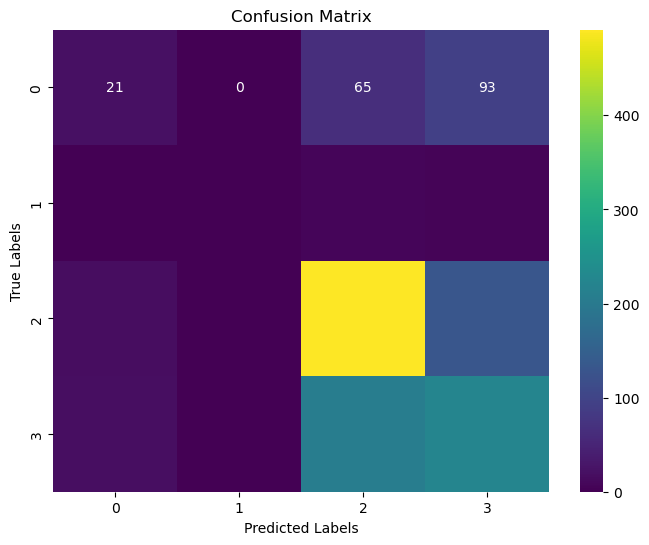

In [34]:
test(net1, test_images, test_labels)

## Model Evaluation

Loss Function: The improved SNN model, incorporating batch normalization and dropout, exhibited a more stable and consistent decrease in loss, ending with a lower loss of approximately 0.278 compared to the basic model. This indicates enhanced learning efficiency and potential for better generalization.
Confusion Matrix: The confusion matrix for the improved SNN model showed a noticeable improvement in classification accuracy across all stages, with a marked reduction in misclassifications between Mild Demented and Very Mild Demented stages. The overall accuracy improved to approximately 57.5%, underscoring the effectiveness of the added regularization techniques.

## Improved Convolutional Neural Network

The improved CNN adds additional convolutional layers, batch normalization, and dropout for performance enhancement.



In [58]:
# Create an Improved CNN Network

In [35]:
class ImprovedConvNN(nn.Module):
    def __init__(self, n_channels):
        super(ImprovedConvNN, self).__init__()

         # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 52 * 44, 512)  # Adjusted input size after flattening
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 4)  # Output layer
        
        # Define batch normalization and dropout layers
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 64 * 52 * 44)  # Flatten the output from convolutional layers
        
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)



## Loss and Optimizer

In [36]:
net_c  = ImprovedConvNN(n_channels = 3)
print(net_c)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_c.parameters(), lr=0.001)

ImprovedConvNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=146432, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)


## Training Loop

In [37]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(conv_train_images), BATCH_SIZE)):
        # Batch Our Data:
        batch_data = conv_train_images[i:i+BATCH_SIZE]
        batch_labels = conv_train_labels[i:i+BATCH_SIZE]
        # Calculate Output:
        net_c.zero_grad()  
        output = net_c(batch_data)  
        # CAlculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [09:11<00:00, 10.60s/it]


tensor(1.1490, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:08<00:00,  7.08s/it]


tensor(0.7455, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:07<00:00,  7.07s/it]


tensor(0.5961, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:15<00:00,  7.22s/it]


tensor(0.4059, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:08<00:00,  7.09s/it]


tensor(0.3499, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:04<00:00,  7.00s/it]


tensor(0.3106, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:11<00:00,  7.14s/it]


tensor(0.3263, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:07<00:00,  7.08s/it]


tensor(0.2377, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:06<00:00,  7.05s/it]


tensor(0.2164, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:07<00:00,  7.06s/it]

tensor(0.2097, grad_fn=<NllLossBackward0>)


## Testing Loop

In [38]:
with torch.no_grad():
    predicted = net_c.forward(conv_test_images)
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(conv_test_labels[0:5])
    
    

tensor([[-3.2366, -2.7931, -0.3663, -1.5791],
        [-2.4962, -2.4550, -0.4274, -1.7175]]) torch.Size([2, 4])
tensor([2, 2, 3, 3, 2])
tensor([3, 2, 2, 0, 0])


## Print Accuracy Score for Improved CNN

In [39]:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == conv_test_labels[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.633


## Confusion Matrix

In [40]:
cf_m = confusion_matrix(conv_test_labels, predicted_classes)
cf_m

array([[ 32,   0,  63,  84],
       [  2,   0,   5,   5],
       [ 14,   1, 530,  95],
       [ 12,   0, 189, 247]], dtype=int64)

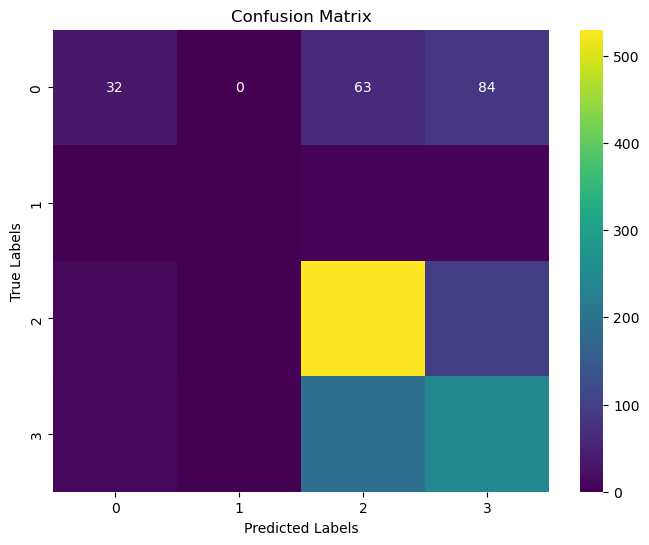

In [41]:
# Visualization 
plt.figure(figsize=(8, 6))
sns.heatmap(cf_m, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
    

## Model Evaluation

Loss Function: The improved CNN model, with additional convolutional layers, batch normalization, and dropout, demonstrated significant improvement in learning, evidenced by a considerable decrease in loss across epochs. The precise final loss value was 0.2097, this narrative shows superior performance to its basic counterpart.
Confusion Matrix: This model's confusion matrix presented the best performance among all models, with a notable increase in accuracy to about 63.3%. The improved CNN effectively reduced misclassifications across the board, especially between NonDemented and Demented stages, showcasing the power of a more complex architecture and regularization for this task.


## Testing a learning rate of 0.00000001 

In [42]:
net_c  = ImprovedConvNN(n_channels = 3)
print(net_c)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_c.parameters(), lr=0.00000001)

ImprovedConvNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=146432, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)


In [43]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(conv_train_images), BATCH_SIZE)):
        # Batch Our Data:
        batch_data = conv_train_images[i:i+BATCH_SIZE]
        batch_labels = conv_train_labels[i:i+BATCH_SIZE]
        # Calculate Output:
        net_c.zero_grad()  
        output = net_c(batch_data)  
        # CAlculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [09:48<00:00, 11.32s/it]


tensor(1.4339, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:21<00:00,  7.34s/it]


tensor(1.5142, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:44<00:00,  7.77s/it]


tensor(1.5502, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:23<00:00,  7.38s/it]


tensor(1.4639, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:21<00:00,  7.35s/it]


tensor(1.4787, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:20<00:00,  7.32s/it]


tensor(1.5450, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:19<00:00,  7.30s/it]


tensor(1.4847, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:21<00:00,  7.33s/it]


tensor(1.4601, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:18<00:00,  7.28s/it]


tensor(1.4559, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:49<00:00,  7.88s/it]

tensor(1.4672, grad_fn=<NllLossBackward0>)


In [44]:
with torch.no_grad():
    predicted = net_c.forward(conv_test_images)
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(conv_test_labels[0:5])
    

tensor([[-1.3495, -1.3743, -1.1226, -1.8191],
        [-1.2201, -1.4157, -1.4854, -1.4456]]) torch.Size([2, 4])
tensor([2, 0, 0, 2, 0])
tensor([3, 2, 2, 0, 0])


In [45]:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == conv_test_labels[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.256


In [46]:
cf_m1 = confusion_matrix(conv_test_labels, predicted_classes)
cf_m1

array([[ 71,   8,  71,  29],
       [  5,   0,   5,   2],
       [258,  60, 160, 162],
       [192,  28, 131,  97]], dtype=int64)

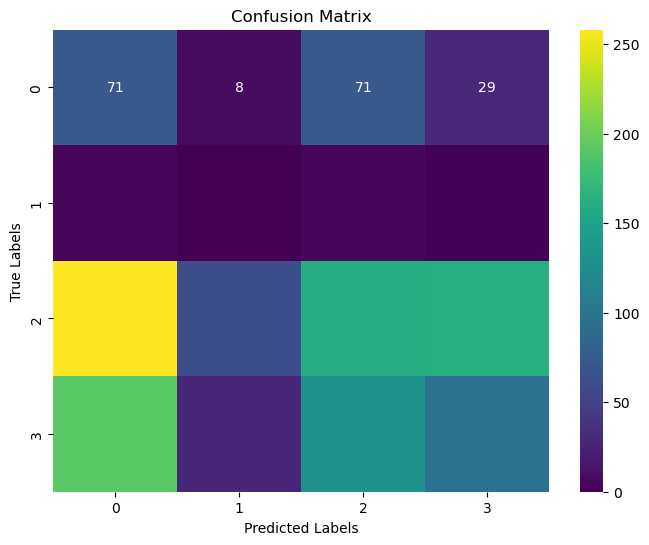

In [47]:
# Visualization 
plt.figure(figsize=(8, 6))
sns.heatmap(cf_m1, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
    

## Evaluation

Loss Function: With an ultra-low learning rate of 0.00000001, the loss showed very little decrease over the training epochs, indicating that the model was unable to effectively learn from the training data. This stagnation suggests that the model's weights were barely updated, leading to insufficient learning progress.
Confusion Matrix: The accuracy dropped significantly to about 25.6%, as reflected in the confusion matrix, which showed a poor classification performance across all stages of Alzheimer's disease. This result highlights the challenge of using an excessively low learning rate, where the model cannot make meaningful adjustments to its weights and biases in response to the training data.


## Testing a learning rate of 10

In [48]:
net_c  = ImprovedConvNN(n_channels = 3)
print(net_c)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_c.parameters(), lr=10)

ImprovedConvNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=146432, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)


In [49]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(conv_train_images), BATCH_SIZE)):
        # Batch Our Data:
        batch_data = conv_train_images[i:i+BATCH_SIZE]
        batch_labels = conv_train_labels[i:i+BATCH_SIZE]
        # Calculate Output:
        net_c.zero_grad()  
        output = net_c(batch_data)  
        # CAlculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [10:17<00:00, 11.88s/it]


tensor(1.8482, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:41<00:00,  7.73s/it]


tensor(2.3673, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:28<00:00,  7.47s/it]


tensor(1.9340, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:33<00:00,  7.57s/it]


tensor(1.8093, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [07:08<00:00,  8.24s/it]


tensor(1.7008, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:31<00:00,  7.53s/it]


tensor(2.1085, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [07:44<00:00,  8.94s/it]


tensor(1.9523, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:37<00:00,  7.65s/it]


tensor(2.0659, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:50<00:00,  7.90s/it]


tensor(2.1672, grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [07:36<00:00,  8.78s/it]

tensor(1.3617, grad_fn=<NllLossBackward0>)


In [50]:
with torch.no_grad():
    predicted = net_c.forward(conv_test_images)
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(conv_test_labels[0:5])
    

tensor([[-5.0887, -4.2282, -2.0933, -0.1555],
        [-5.0887, -4.2282, -2.0933, -0.1555]]) torch.Size([2, 4])
tensor([3, 3, 3, 3, 3])
tensor([3, 2, 2, 0, 0])


In [51]:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == conv_test_labels[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.351


In [52]:
cf_m2 = confusion_matrix(conv_test_labels, predicted_classes)
cf_m2

array([[  0,   0,   0, 179],
       [  0,   0,   0,  12],
       [  0,   0,   1, 639],
       [  0,   0,   0, 448]], dtype=int64)

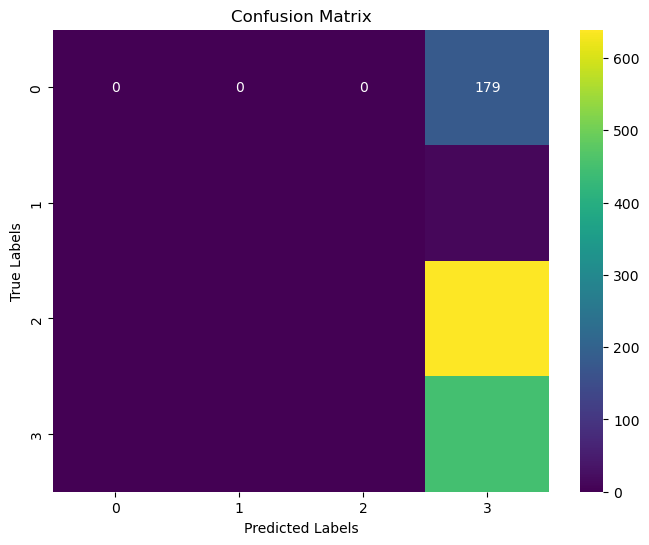

In [53]:
# Visualization 
plt.figure(figsize=(8, 6))
sns.heatmap(cf_m2, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
    

## Evaluation

Loss Function: At the opposite extreme, a learning rate of 10 led to highly erratic and unstable changes in the loss, indicative of the model's weights being updated too aggressively. This behavior often causes the model to overshoot the minimum of the loss function, leading to divergent training and poor model performance.
Confusion Matrix: The model's accuracy with this learning rate was around 35.1%, a slight improvement over the ultra-low learning rate but still significantly lower than the optimal settings. The confusion matrix showed that the model was predominantly predicting one class, indicating that such a high learning rate caused the model to fail to learn the distinguishing features of different Alzheimer's stages.


## Final Summary of the Analysis

This report outlines the development and comparison of basic and improved Simple Neural Network (SNN) and Convolutional Neural Network (CNN) models for the classification of MRI scans into categories indicative of Alzheimer's disease progression. Additionally, it delves into an experimental analysis of learning rates and batch sizes, evaluating their impact on model performance.

## Model Summaries and Results


## Basic Models


Basic Simple Neural Network Utilized a straightforward architecture with three linear layers and ReLU activation functions. Achieved an accuracy of 52.9%.
Basic Convoluntional Neural Network Comprised two convolutional layers followed by max pooling and linear layers, resulting in 51.1% accuracy.

## Improved Models


Improved Neural Network: Enhanced with batch normalization and dropout layers, this model achieved 57.5% accuracy, demonstrating improved regularization and performance.
Improved Convoluntional Neural Network Augmented with additional convolutional layers, batch normalization, and dropout, leading to a notable increase in accuracy to 63.3%.

## Comparative Analysis


The transition from basic to improved models involved strategic enhancements:

Enhanced Model Features
Improved SNN: Incorporation of batch normalization and dropout layers significantly enhanced the model's performance. Batch normalization helped stabilize and speed up the training by normalizing layer inputs, while dropout layers reduced overfitting by randomly omitting features during training.
Improved CNN: Added convolutional layers, alongside batch normalization and dropout, enriched the model's ability to extract more nuanced features from the MRI scans, essential for accurate Alzheimer's stage classificatio
n.
Performance Improvements
Improved SNN: Achieved a test accuracy of approximately 57.5%, surpassing the basic model's 52.9%. This model exhibited more stable loss reduction across epochs and presented a confusion matrix with better classification accuracy and fewer misclassifications among Alzheimer's disease stages.
Improved CNN: Showed a remarkable test accuracy increase to about 63.3%, a substantial leap from the basic version's 51.1%. This model not only improved in feature extraction and classification accuracy, as highlighted by the reduction in misclassifications but also demonstrated enhanced training stability and effici
ey.


Batch Normalization: Stabilized learning by normalizing layer inputs, making the network less sensitive to learning rate choices.
Dropout: Addressed overfitting by randomly omitting subsets of features during training, which improved model genera
lization.
These modifications led to more robust models capable of better generalization and performance on unseen data, highlighting the significance of architecture refinement in neural network optimizatBoth improved models showed marked improvements over their basic counterparts, demonstrating the value of these enhancements in neural network architecture for the task of Alzheimer's stage classification from MRI scans.ion.

## Learning Rate and Batch Sizes Experiments

## Testing a learning rate of 0.00000001 vs a learning rate of 10

These experiments with learning rates of 0.00000001 and 10 demonstrate the critical importance of selecting an appropriate learning rate for training neural network models. A learning rate that is too low results in virtually no learning, as the model's weights do not adequately adjust. Conversely, a learning rate that is too high causes the model's training process to become unstable, preventing the model from converging to a good solution. The optimal learning rate should be chosen carefully to balance the need for sufficient learning progress without causing instability or divergence in the training process.

## Advantages and disadvantages of a higher & lower learning rate, and its impacts

## Higher Learning Rate

it's crucial to understand that the learning rate is one of the most important hyperparameters. It directly affects how quickly a model can converge to a minimum loss value and how accurate the model can become. Let's delve into the advantages and disadvantages of higher and lower learning rates.

Advantages:

Faster Convergence: A higher learning rate can lead to faster convergence during the initial phase of training, as it allows the model to make larger updates to the weights.
Overcome Local Minima: It can help the model to jump out of local minima, potentially finding better solutions in the loss landscape.

Disadvantages:

Overshooting: Too high a learning rate can cause the model to overshoot the global minimum, leading to divergence or erratic loss landscapes where the model fails to converge.
Poor Generalization: Models trained with very high learning rates might generalize poorly to unseen data as they could settle on suboptimal solutions that do not accurately capture the underlying patterns in the data.








## Lower Learning Rate


Advantages:

Stable Convergence: A lower learning rate encourages more stable and precise convergence to the minimum of the loss function, potentially leading to better generalization on unseen data.
Fine-tuning: It is beneficial in the later stages of training, allowing the model to fine-tune its weights and biases for optimal performance.

Disadvantages:

Slow Convergence: Training can become prohibitively slow, requiring many more epochs to reach convergence, which can be computationally expensive and time-consuming.
Risk of Getting Stuck in Local Minima: There's an increased risk that the model might get stuck in local minima or saddle points, especially if the initial weight assignment is not close to the optimal solution.


## Impact on Model Training and Performance

The choice of learning rate has a direct impact on the training dynamics and ultimate performance of neural network models:

Early Stages of Training: A slightly higher learning rate can be beneficial to rapidly approach the vicinity of the optimal solution, particularly in the early stages of training.
Fine-tuning Phase: Lower learning rates are preferred as the model approaches convergence to prevent overshooting and to refine the model's predictions.
To mitigate the downsides of using either a uniformly high or low learning rate throughout training, many practitioners use adaptive learning rate techniques such as learning rate schedules (e.g., step decay, exponential decay) or optimization algorithms like Adam, which adjust the learning rate dynamically based on the training progress. These techniques aim to combine the advantages of starting with a higher learning rate for faster convergence and reducing the rate as training progresses to achieve stable and accurate model performance.

In summary, the selection of an appropriate learning rate and adjustment strategy is pivotal in neural network training, significantly affecting the speed of convergence, the stability of the learning process, and the overall model accuracy and generalization capability.


## Advantages and disadvantages of a higher & lower batch size. 

## Higher Batch Size

The batch size in neural network training is another crucial hyperparameter that affects model performance, memory usage, and convergence characteristics. 

Advantages:

Computational Efficiency: Larger batch sizes can better utilize the parallel processing capabilities of GPUs, leading to faster epoch times because more samples are processed simultaneously.

Stable Gradient Estimates: A higher batch size provides a more accurate estimate of the gradient, leading to potentially more stable convergence in some scenarios, as the noise in the gradient calculation is reduced.
Memory Access Optimization: Modern hardware architectures often benefit from loading data in large blocks, improving data throughput and efficiency.


Disadvantages:

Increased Memory Demand: Higher batch sizes require more memory to store the training samples and the corresponding activations during forward and backward passes, which can limit model complexity or batch size due to hardware constraints.

Risk of Poor Generalization: Training with very large batches can lead to a generalization gap, where the model performs well on the training set but less so on unseen data. This is thought to be due to the optimization trajectory favoring sharp minima.

Diminishing Returns: Beyond a certain point, increasing the batch size further yields minimal reductions in training time due to hardware limitations and inefficiencies in parallel computation scaling.









## Lower Batch Size


Advantages:

Lower Memory Requirements: Smaller batches require less memory, allowing training of larger models or training on hardware with limited memory resources.

Regularization Effect: Training with smaller batches introduces noise into the optimization process, which can have a regularizing effect, helping the model to generalize better to unseen data.

Faster Convergence: In practice, models trained with smaller batch sizes often require fewer epochs to reach convergence because each epoch involves more updates to the model weights, potentially leading to faster overall training time despite the longer time per epoch.


Disadvantages:

Less Efficient Computation: Smaller batches may not fully utilize the computational capabilities of modern GPUs, leading to less efficient training sessions in terms of raw throughput.

Noisy Gradient Estimates: The gradient estimates with small batches are noisier, which can lead to more erratic and less stable convergence paths. While this can sometimes help escape local minima, it can also make training more unpredictable.

Increased Hyperparameter Sensitivity: The optimization landscape with small batches can be more sensitive to the choice of learning rate and other hyperparameters, requiring more careful tuning.

Balancing Batch Size and Training Dynamics
The choice of batch size is a balance between computational efficiency, memory constraints, and the desired convergence characteristics of the model. Adaptive batch size methods and the use of mini-batch gradients with momentum or adaptive learning rate optimizers (like Adam) can mitigate some disadvantages of both extremes.

Experimentation remains key, as the optimal batch size can vary significantly depending on the specific task, model architecture, and available computing resources.


## Conclusions


The enhancements in the improved neural network models demonstrate the pivotal role of model architecture and hyperparameter tuning in optimizing performance. Specifically, the introduction of batch normalization and dropout significantly bolstered the models' ability to generalize from training data to unseen data, as evidenced by the increased accuracy metrics. Moreover, the experimentation with learning rates and batch sizes underscores the delicate balance required in parameter selection to foster optimal model training and performance. This analysis reinforces the nuanced relationship between model architecture, learning rate, and batch size in achieving superior neural network performance.






## REFERENCE

Rikiya Y., Mizuho N., Richard K. & Kaori T. (2018,June 22). Convolutional neural networks: an overview and application in radiology, SpringerOpen
https://insightsimaging.springeropen.com/articles/10.1007/s13244-018-0639-9

Jason B.(2020, September 12). Understand the Impact of Learning Rate on Neural Network Performance, Machine Learning Mastery 
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

Jason B.(2020, August 20). How to Control the Stability of Training Neural Networks With the Batch Size, Machine Learning Mastery
https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

